<a href="https://colab.research.google.com/github/elvis-darko/NATURAL-LANGUAGE-PROCESSING--SENTIMENT-ANALYSIS/blob/main/LP_5_Fine_tuning_Hugging_face_text_classification_model_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALL PACKAGES AND LOAD DATA

In [1]:
pip install huggingface_hub

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 268.8/268.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Login to Hugging Face from Colab
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
pip install --upgrade jax

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 22.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jax: filename=jax-0.4.14-py3-none-any.whl size=1535364 sha256=5c5c15cf91fa240923ba3dd0b26acea6cd54121f2ec56688dc19cad647cfacfd
  Stored in directory: /root/.cache/pip/wheels/85/52/e7/dfa571c9f9b879e3facaa1584f52be04c4c3d1e14054ef40ab
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.4.13
    Uninstalling jax-0.4.13:
      Successfully uninstalled jax-0.4.13


In [ ]:
pip install --upgrade protobuf

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 304.5/304.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [ ]:
pip install --upgrade TensorFlow

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 57.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.6/5.6 MB 66.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 440.8/440.8 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully

In [ ]:
!pip3 install -qU transformers[all] datasets accelerate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.4/7.4 MB 49.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 492.4/492.4 kB 46.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 244.2/244.2 kB 27.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 96.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 35.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83.8/83.8 kB 12.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
pip install bitsandbytes-cuda112

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.2/4.2 MB 2.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade Torch

In [ ]:
pip install pipeline

In [ ]:
pip install gradio

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.8/19.8 MB 33.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 65.7/65.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289.0/289.0 kB 27.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.4/75.4 kB 8.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.5/50.5 kB 3.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 138.7/138.7 kB 16.6 MB/s eta 0:00:00
    

In [ ]:
pip install xformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 109.1/109.1 MB 8.9 MB/s eta 0:00:00


In [1]:
pip install emoji

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 361.8/361.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=0a259387ae5f2d1e33021d49de56d54c843680e7620684aff6ce4694ba6fa5bd
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [2]:
pip install wordcloud

In [ ]:
# Import required libraries

import os
import pandas as pd
import numpy as np
from scipy.special import softmax

import collections
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_metric
from datasets import load_dataset

import streamlit as st
import streamlit.components.v1 as com

from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers.trainer_utils import IntervalStrategy
from transformers import EarlyStoppingCallback
from transformers import pipeline
from transformers import AutoConfig

import torch
from torch import nn
from torch.optim.optimizer import Optimizer
import bitsandbytes as bnb

from typing import Tuple, Optional, Callable

==============================WARNING: DEPRECATED!==============================
WARNING! This version of bitsandbytes is deprecated. Please switch to `pip install bitsandbytes` and the new repo: https://github.com/TimDettmers/bitsandbytes
==============================WARNING: DEPRECATED!==============================


In [ ]:
# Disabe W&B
os.environ["--report_to none"] = "true"

In [1]:
# Load the CSV file into a DataFrame

url = "https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/raw/master/zindi_challenge/data/Train.csv"

data = pd.read_csv(url)

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Check basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [ ]:
# Check the shape of the data
data.shape

(10001, 4)

##### The data has 10001 columns and 4 rows

In [ ]:
# Load train and check sample
data.sample(5, random_state=2)



tweet_id                                          safe_text  label  \
7696  XHMIJEM6  US Ag Secretary Tom Vilsack <user> the speed t...    0.0   
7429  04SJ8C44  Dr. Mary Mora speaking at the immunization pre...    1.0   
1919  T5LGEZ5F  People talk about how they aren't getting ther...    1.0   
4433  71RO2BQ7  Oh I've had it with people saying #autism is c...    1.0   
8074  XZGXUITT  vaccinations for uganda... and a flu shot (@ U...    1.0   

      agreement  
7696   1.000000  
7429   0.666667  
1919   1.000000  
4433   1.000000  
8074   0.666667

In [ ]:
# Check for null values in the data
data.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [5]:
# Remove null values from the data
data = data[~data.isna().any(axis=1)]

In [ ]:
# Check for duplicated values in the data
data.duplicated().any()

False

In [ ]:
# Check 5 examples of tweets

for tweet in range(5):
    tweet_str = data['safe_text'][tweet]
    print(f'{tweet_str}\n')

Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>

I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day

#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD

I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that

Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr‚Ä¶ <url>



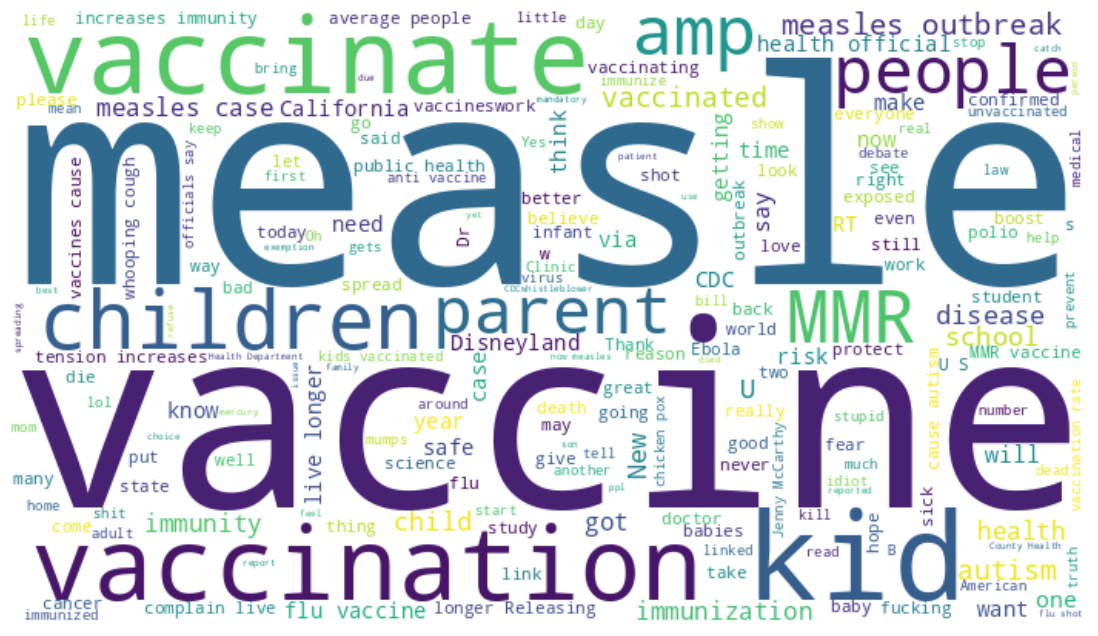

In [2]:
# Use wordcloud to check most used words

data["safe_text"] = data["safe_text"].replace({"user" : "", "url" : ""}, regex = True)

text = "".join(tweet for tweet in data.safe_text)
wordcloud = WordCloud(width = 700, height = 400, max_font_size = 250, background_color = "white").generate_from_text(text)

# Display wordcloud image

plt.figure(figsize = (16, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

From the WordCloud above, it can be seen that the most used words are measles, vaccine, disease, risk, vaccination.


In [3]:
# Extract used emojis from tweets
tweets = "".join(data["safe_text"].astype(str))
def extract_emojis(tweet):
  return ''.join(E for E in tweet if E in emoji.EMOJI_DATA)

emoji = extract_emojis(tweets)
emoji

'üòÇüò≥üò≥üò≥üò≥üò≥üò∑üò∑üò∑‚ù§‚ù§‚ù§üò∑üî•üî•üî•üòéüëçüòÇüòÇüò≥üëèüëèüëèüëèüëèüëèüëèüëèüëèüòí‚úå‚ò∫üíñüôÖüíôüò∏üè´üò†üòÇüòÇüòÇüòÇüî•üî•üî•üö®üö®üòêüí•üòÇüòÇüòÇ‚úãüòíüíâüíâüíâüíôüíôüòíüççüçäüåΩüçàüòúüòÅüòûüíâüò≠üòÇüò£üíîüò≠üò≠üò≠üî•üî•üî•üî•üî•üí•üí•üí•üí•‚ñ∂üò¢üò±üòíüòçüëçüòÇüòÇüòÇüòÇüò•üëéüíâüòÇüòÇüíØüòäüò∑üò∑üò∑üò∑üòºüòÇüò≠üé∂üññüèªüòøüò©‚òùüò≥üò≠üññüèªüòÇüëçüí£üòÖüòÖüíãüôåüåÉüòåüòÇüò°üò°üò°üò°üò°üò°üò°üëÄüëèüëèüëèüëèüíÅ‚Äºüò∑¬Æ‚Ñ¢üòîüòÇüò∞üò∑üíâüò¨üëçüòÇüò±üëäüò≥üò∑üí•üí•üí•üí•üí•üí•üòÇüòÇüòÇüòÇüòÇüòÇüôå‚úÖ‚úÖ‚úÖüëèüò±üëèüëèüëèüëèüòíüò∑üò©üò´üò∑üòÇüòèüòÇüòÇüòÇüòÄüëéüò≥üòÇüò≥üò≥üò≥üòÇüòÇüòÇüòäüòÇüòÇüòÇüòÇüòÉüëåüò∑üëåüíØ‚ò∫üëä‚úåüò±üò±üò±üò•üëéüëäüòÇüòÇüíûüêïüò∫üòòüòëüôàüòÇüò≠üòÇüò≠üòÇüíÄüò®üòì‚úãüíâüé°üíöüåïüêÖüòíüòÇüò±üò≠üò≥üíôüíâüòëüëäüèæüòÖüò•üò°

In [10]:
# Show the top 20 used emojis

# create a list for emoji
list_emojis = list(emoji)

# Check frequency of each emoji
dict_emoji = dict(collections.Counter(list_emojis))

# Convert the dictionary to ascending order
dict_emoji = sorted(dict_emoji.items(), key = lambda x :x[1], reverse=True)

# Convert dictionary to pandas DataFrame
df_emoji = pd.DataFrame(dict_emoji, columns = ["emoji", "count"])

# Print the dataframe
df_emoji.head(20)

emoji  count
0      üòÇ    140
1      üíâ     63
2      üò∑     58
3      üî•     52
4      üò≠     40
5      üò≥     39
6      üí•     30
7      üòí     29
8      üôå     27
9      üëè     25
10     üò°     25
11     üò©     23
12     üëç     20
13     üòä     19
14     üòë     12
15     ‚ù§     11
16     üòÅ     11
17     üò±     11
18     üòè     11
19     üòÖ     10

- From the above, the most frequently used emoji is üòÇ with 140 occurrences. This emojiis used for amusemenent orlaughter.
- Thesecond most used emoji is üíâ with 63 usages.This emoji is a syringe and wull probably be used to signify vaccination
- The third is üò∑ with 58 usages.This emoji with a covered mouth may be used to represent health precuation.


 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64


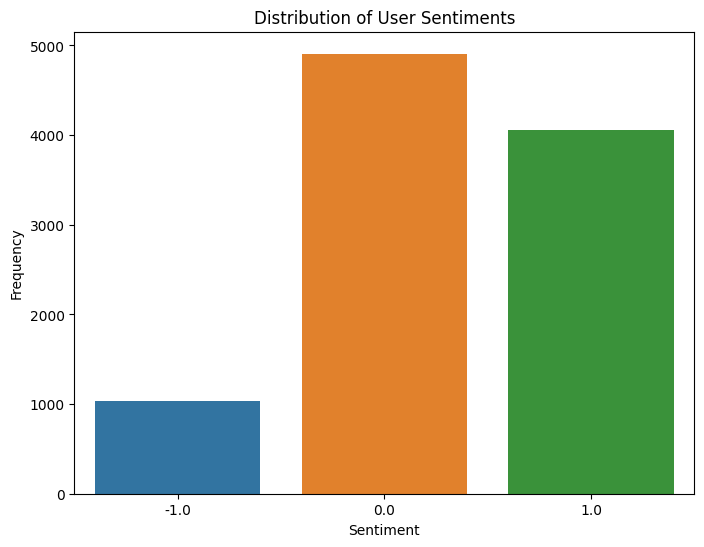

In [7]:
# Visualize sentiment of users. Remember that 1 stands for positive,0 stands for negative, and -1 stands for negative.

# Check count of distinct values
distinct_labels = data["label"].value_counts()
print(distinct_labels)

# create a bar chart to display the ditinct counts of lables
data["label"] = data["label"].astype("category")

plt.figure(figsize = (8, 6))
sns.barplot(x = data["label"].value_counts().index, y = data["label"].value_counts().values)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of User Sentiments")
plt.show()

From the graph above;
- Tweets with postive sentiments were 4053.
- Tweets with negative sentiments were 1038.
- Tweets with neutral sentiments were 4908.

# SPLITTING DATA INTO TRAIN AND EVALUATION SETS

In [ ]:
# Split the train data => {train, eval}
train, eval = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

In [ ]:
# Check sample of train data
train.sample(5, random_state=1)

tweet_id                                          safe_text  label  \
2154  HVXIFKV9  ‚ÄúOn average, people who complain live longer -...    0.0   
535   4SERFCJ0                  <user> you don't deserve 3.2k mmr    0.0   
5695  ULFIRO7F  <user> yall started that measles shit dammit y...    0.0   
5147  ERE7QW6X  <user> Did you support your way to high mmr? E...    0.0   
3063  GMP7SBSA  <user> well as an adult it was your choice. Th...    1.0   

      agreement  
2154        1.0  
535         1.0  
5695        1.0  
5147        1.0  
3063        1.0

In [ ]:
# Check sample of evaluation data
eval.sample(5, random_state=2)

tweet_id                                          safe_text  label  \
8405  TZ6BBZ9M  "<user> Parents that chose not to vaccinate th...    1.0   
9489  HJCEWS4Q  DuPage County Warns of Potential Measles Expos...    1.0   
1090  B99VEJ3T  Wally tricks him into thinking the girl is dea...    0.0   
6311  P29W1N5C  Measles Invades  The U.S. As The Anti-Vaccine ...    0.0   
4959  988MESPA  He can't handle measles let alone      Ebola. ...    0.0   

      agreement  
8405   1.000000  
9489   0.666667  
1090   1.000000  
6311   0.666667  
4959   0.666667

In [ ]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 4), eval is (2000, 4)


In [ ]:
# Save the new data created to different csv files
train.to_csv("train_data.csv", index=False)
eval.to_csv("eval_data.csv", index=False)

In [ ]:
# Load saved data to Hugging Face
dataset = load_dataset('csv',
                        data_files={'train': 'train_data.csv',
                        'eval': 'eval_data.csv'}, encoding = "ISO-8859-1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-09b85d323f125a7e/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

# FINE-TUNING WITH ROBERTA BASE


In [ ]:
# autokenizing with Roberta Base
roberta_tokenizer = AutoTokenizer.from_pretrained('roberta-base')

In [ ]:
# transform target features in data

def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return roberta_tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

In [ ]:
# View features of transformed dataset

dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [ ]:
# Configure the trianing parameters like `num_train_epochs`: the number of time the model will repeat the training loop over the dataset

training_args = TrainingArguments(
    "elvis_roberta",
    num_train_epochs=10,
    optim = "adafactor",
    evaluation_strategy=IntervalStrategy.STEPS,
    save_strategy=IntervalStrategy.STEPS,
    save_steps = 500,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size  = 4,
    warmup_steps = 500,
    logging_steps = 500,
    fp16=False,
    gradient_accumulation_steps=16,
    dataloader_num_workers=0,
    learning_rate=3e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    push_to_hub=True,
)


# Define the early stopping callback

early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,                       # Number of epochs with no improvement before stopping training
    early_stopping_threshold=0.01,                   # Minimum improvement in the metric for considering an improvement
)

# Combine the training arguments and the early stopping callback

training_args.callbacks = [early_stopping]

In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=500,
evaluation_strategy=steps,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=16,
gradient_checkpointing=False,
greater_is_better=False,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_tok

In [ ]:
# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model_roberta = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should pr

In [ ]:
train_dataset = dataset['train'].shuffle(seed=10)
eval_dataset = dataset['eval'].shuffle(seed=10)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    rmse = np.sqrt(np.mean((predictions - labels)**2))
    return {"rmse": rmse}

In [ ]:
trainer = Trainer(
    model=model_roberta,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/elvis-d/elvis_roberta into local empty directory.


Download file pytorch_model.bin:   0%|          | 25.4k/476M [00:00<?, ?B/s]

Download file training_args.bin: 100%|##########| 4.00k/4.00k [00:00<?, ?B/s]

Download file runs/Jul18_14-43-51_05e1194e046f/events.out.tfevents.1689691539.05e1194e046f.9502.0: 100%|######‚Ä¶

Clean file training_args.bin:  25%|##5       | 1.00k/4.00k [00:00<?, ?B/s]

Clean file runs/Jul18_14-43-51_05e1194e046f/events.out.tfevents.1689691539.05e1194e046f.9502.0:  22%|##2      ‚Ä¶

Clean file pytorch_model.bin:   0%|          | 1.00k/476M [00:00<?, ?B/s]

In [ ]:
# Launch the learning process: training
trainer.train()

TrainOutput(global_step=1250, training_loss=0.391364501953125, metrics={'train_runtime': 7573.3173, 'train_samples_per_second': 10.562, 'train_steps_per_second': 0.165, 'total_flos': 2.104644228406272e+16, 'train_loss': 0.391364501953125, 'epoch': 10.0})

In [ ]:
# Launch the final evaluation
eval_results = trainer.evaluate()

In [ ]:
# Create a dictionary of the evaluation result
results = {
    "Model" : "roberta",
    "Loss"  : eval_results["eval_loss"],
    "RMSE"  : eval_results["eval_rmse"],
    "Runtime" : eval_results["eval_runtime"],
    "Samples_per_second" : eval_results["eval_samples_per_second"],
    "Steps_per_secon" : eval_results["eval_steps_per_second"]
}

In [ ]:
# Create a pandas Dataframe from the dictionary
roberta_evaluation = pd.DataFrame([results])
roberta_evaluation

Model      Loss     RMSE  Runtime  Samples_per_second  Steps_per_secon
0  roberta  0.628239  0.56745  66.4121              30.115            7.529

In [ ]:
# Push  model to hub
trainer.push_to_hub()

Upload file runs/Jul18_16-56-49_7d4f690ad7d3/events.out.tfevents.1689699592.7d4f690ad7d3.201.0:   0%|         ‚Ä¶

Upload file runs/Jul18_16-56-49_7d4f690ad7d3/events.out.tfevents.1689707386.7d4f690ad7d3.201.2:   0%|         ‚Ä¶

Upload file runs/Jul18_16-56-49_7d4f690ad7d3/events.out.tfevents.1689707230.7d4f690ad7d3.201.1:   0%|         ‚Ä¶

To https://huggingface.co/elvis-d/elvis_roberta
   fa5cf52..21957ce  main -> main

   fa5cf52..21957ce  main -> main

To https://huggingface.co/elvis-d/elvis_roberta
   21957ce..a1730b0  main -> main

   21957ce..a1730b0  main -> main



'https://huggingface.co/elvis-d/elvis_roberta/commit/21957cee67a9888b0f2c0da9cae5548261f7c1d1'

In [ ]:
# Push tokenizer to hub
roberta_tokenizer.push_to_hub("elvis_roberta")

CommitInfo(commit_url='https://huggingface.co/elvis-d/elvis_roberta/commit/2b3ace76a0e984db6784bc0849c67d246905d89f', commit_message='Upload tokenizer', commit_description='', oid='2b3ace76a0e984db6784bc0849c67d246905d89f', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# Push model to hub
model_roberta.push_to_hub("elvis_roberta")

CommitInfo(commit_url='https://huggingface.co/elvis-d/elvis_roberta/commit/d108cf1ad5ce794de26a2ad9a6663997545d0f35', commit_message='Upload RobertaForSequenceClassification', commit_description='', oid='d108cf1ad5ce794de26a2ad9a6663997545d0f35', pr_url=None, pr_revision=None, pr_num=None)

# FINE TUNING WITH BERT BASE MODEL

In [ ]:
# autokenizing with Distil Bert Base
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return bert_tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [ ]:
# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset

training_args = TrainingArguments(
    "elvis_bert_base",
    num_train_epochs = 10,
    optim = "adafactor",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate = 3e-5,
    weight_decay = 0.01,
    load_best_model_at_end = True,
    push_to_hub = True
)

# Define the early stopping callback
early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,                       # Number of epochs with no improvement before stopping training
    early_stopping_threshold=0.01,                   # Minimum improvement in the metric for considering an improvement
)

# Combine the training arguments and the early stopping callback
training_args.callbacks = [early_stopping]

In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=False,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_

In [ ]:
# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning

bert_model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = dataset['train'].shuffle(seed=10)
eval_dataset = dataset['eval'].shuffle(seed=10)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    rmse = np.sqrt(np.mean((predictions - labels)**2))
    return {"rmse": rmse}

In [ ]:
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

Cloning https://huggingface.co/elvis-d/elvis_bert_base into local empty directory.


Download file pytorch_model.bin:   0%|          | 18.4k/413M [00:00<?, ?B/s]

Download file runs/Jul18_19-53-04_20a0331e530c/events.out.tfevents.1689710095.20a0331e530c.854.0: 100%|#######‚Ä¶

Download file runs/Jul18_19-25-17_7d4f690ad7d3/events.out.tfevents.1689708365.7d4f690ad7d3.201.3: 100%|#######‚Ä¶

Clean file runs/Jul18_19-53-04_20a0331e530c/events.out.tfevents.1689710095.20a0331e530c.854.0:  10%|9         ‚Ä¶

Clean file runs/Jul18_19-25-17_7d4f690ad7d3/events.out.tfevents.1689708365.7d4f690ad7d3.201.3:  22%|##1       ‚Ä¶

Download file runs/Jul19_02-18-49_4fabd4635ce2/events.out.tfevents.1689733258.4fabd4635ce2.632.0: 100%|#######‚Ä¶

Download file training_args.bin: 100%|##########| 4.06k/4.06k [00:00<?, ?B/s]

Clean file runs/Jul19_02-18-49_4fabd4635ce2/events.out.tfevents.1689733258.4fabd4635ce2.632.0:  10%|#         ‚Ä¶

Clean file training_args.bin:  25%|##4       | 1.00k/4.06k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/413M [00:00<?, ?B/s]

In [ ]:
# Launch the learning process: training

trainer.train()

TrainOutput(global_step=10000, training_loss=0.21776757802963256, metrics={'train_runtime': 9476.5473, 'train_samples_per_second': 8.441, 'train_steps_per_second': 1.055, 'total_flos': 2.104644228406272e+16, 'train_loss': 0.21776757802963256, 'epoch': 10.0})

In [ ]:
# Launch the final evaluation
eval_results = trainer.evaluate()

In [ ]:
# Create a dictionary of the evaluation result
results = {
    "Model" : "bert_base",
    "Loss"  : eval_results["eval_loss"],
    "RMSE"  : eval_results["eval_rmse"],
    "Runtime" : eval_results["eval_runtime"],
    "Samples_per_second" : eval_results["eval_samples_per_second"],
    "Steps_per_secon" : eval_results["eval_steps_per_second"],
    "Epoch"  : eval_results["epoch"]
}

In [ ]:
# Create a pandas Dataframe from the dictionary
bert_base_evaluation = pd.DataFrame([results])
bert_base_evaluation

Model      Loss      RMSE  Runtime  Samples_per_second  \
0  bert_base  0.632458  0.673053  73.9243              27.055   

   Steps_per_secon  Epoch  
0            3.382   10.0

In [ ]:
# Push  model to hub
trainer.push_to_hub()

Upload file runs/Jul19_07-30-43_5044bac4784e/events.out.tfevents.1689751993.5044bac4784e.555.0:   0%|         ‚Ä¶

Upload file runs/Jul19_07-30-43_5044bac4784e/events.out.tfevents.1689761544.5044bac4784e.555.1:   0%|         ‚Ä¶

To https://huggingface.co/elvis-d/elvis_bert_base
   6fcdda8..9f96ca8  main -> main

   6fcdda8..9f96ca8  main -> main

To https://huggingface.co/elvis-d/elvis_bert_base
   9f96ca8..c672c38  main -> main

   9f96ca8..c672c38  main -> main



'https://huggingface.co/elvis-d/elvis_bert_base/commit/9f96ca8164d66222613e19ce671d2ee221290ea2'

In [ ]:
# Push tokenizer to hub
bert_tokenizer.push_to_hub("elvis_bert_base")

CommitInfo(commit_url='https://huggingface.co/elvis-d/elvis_bert_base/commit/76031a7d109471d27dde9ae2573f6c667100010a', commit_message='Upload tokenizer', commit_description='', oid='76031a7d109471d27dde9ae2573f6c667100010a', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# Push model to hub
bert_model.push_to_hub("elvis_bert_base")

CommitInfo(commit_url='https://huggingface.co/elvis-d/elvis_bert_base/commit/86cfc7c9c470ece3bbd37bc162db6a10b7a3bf24', commit_message='Upload BertForSequenceClassification', commit_description='', oid='86cfc7c9c470ece3bbd37bc162db6a10b7a3bf24', pr_url=None, pr_revision=None, pr_num=None)

#USING NEWLY TRAINED MODELS TO BUIL SENTIMENT ANALYSIS APP WITH STREAMLIT

In [ ]:
#Set the page configs
st.set_page_config(page_title='TWEET SENTIMENT ANALYSIS',page_icon='ü§ó',layout='wide')

#welcome Animation
com.iframe("https://lottie.host/?file=8c9ae0c8-e9fc-4fc7-954e-16f922db889b/0BlrGUjJxw.json")
st.markdown("<h1 style='text-align: center'> TWEET SENTIMENT FOR COVID VACCINATION </h1>",unsafe_allow_html=True)
st.write("<h2 style='font-size: 24px;'> Text Classification Models developed to ascertain public perception of covid vaccines </h2>",unsafe_allow_html=True)

#Create a form to take user inputs
with st.form(key='tweet',clear_on_submit=True):
    #input text
    text=st.text_area('Please enter tweet of vaccine perception')
    #Set examples
    alt_text=st.selectbox("Choose any of the sample tweets",('-select-', 'Vaccines have been good so far', 'Had a bad experience with the vaccine', 'Covid is human made. The vaccines are deadly', 'Unqualified people administered  vaccine', 'Vaccine is dangerous to women', 'Vaccine can kill people with anaemia', 'Vaccine protects us from the deadly virus'))
    #Select a model
    models={'Bert':'elvis-d/elvis_bert_base',
        'Roberta': 'elvis-d/elvis_roberta'}
    model=st.selectbox('Select preferred model',('Bert','Roberta'))
     #Submit
    submit=st.form_submit_button('Predict','Continue processing input')

selected_model=models[model]

#create columns to show outputs
col1,col2,col3=st.columns(3)
col1.write('<h2 style="font-size: 24px;"> Sentiment Emoji </h2>', unsafe_allow_html=True)
col2.write('<h2 style="font-size: 24px;"> Vaccine Perception of User </h2>', unsafe_allow_html=True)
col3.write('<h2 style="font-size: 24px;"> Model Prediction Confidence </h2>', unsafe_allow_html=True)

if submit:
    #Check text
    if text=="":
        text=alt_text
        st.success(f"input text is set to '{text}'")
    else:
        st.success('Hey, tweet received', icon='üëçüèº')

    #import the model
    pipe=pipeline(model=selected_model)


    #pass text to model
    output=pipe(text)
    output_dict=output[0]
    lable=output_dict['label']
    score=output_dict['score']

        #output
    if lable=='NEGATIVE' or lable=='LABEL_0':
        with col1:
            com.iframe("https://lottie.host/?file=c8010531-31de-4dc8-8952-1aa854314455/NQNXZWPduv.json")
        col2.write('NEGATIVE')
        col3.write(f'{score*100:.2f}%')
    elif lable=='POSITIVE'or lable=='LABEL_2':
        with col1:
            com.iframe("https://lottie.host/?file=51ba274f-064a-4d67-877b-159f4490a944/pBBe4CCH8e.json")
        col2.write('POSITIVE')
        col3.write(f'{score*100:.2f}%')
    else:
        with col1:
            com.iframe("https://lottie.host/?file=4e8f4b09-bafb-4ff8-9749-2470c459dce1/v5FATJ9QVm.json")
        col2.write('NEUTRAL')
        col3.write(f'{score*100:.2f}%')